In [1]:
import os
import random
import numpy as np
from io import BytesIO

# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

# Interactive widgets
from ipywidgets import widgets

In [4]:
TRAIN_DIR = r"D:\TensorflowPractice\venv\Datasets\rps\rps"
VAL_DIR = r"D:\TensorflowPractice\venv\Datasets\rps-test-set\rps-test-set"

print(os.listdir(TRAIN_DIR))
print(os.listdir(VAL_DIR))

rock_files = os.listdir(os.path.join(TRAIN_DIR,'rock'))
paper_files = os.listdir(os.path.join(TRAIN_DIR,'paper'))
scissors_files = os.listdir(os.path.join(TRAIN_DIR,'scissors'))

print(f"5 files in the rock subdir: {rock_files[:5]}")
print(f"5 files in the paper subdir: {paper_files[:5]}")
print(f"5 files in the scissors subdir: {scissors_files[:5]}")

['paper', 'rock', 'scissors']
['paper', 'rock', 'scissors']
5 files in the rock subdir: ['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png']
5 files in the paper subdir: ['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png']
5 files in the scissors subdir: ['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png']


In [17]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(150,150),
    batch_size=32,
    label_mode='categorical'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(150,150),
    batch_size=32,
    label_mode='categorical'
)

train_dataset_final = (
    train_dataset
    .cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
)

validation_dataset_final = (
    validation_dataset
    .cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
)

Found 2520 files belonging to 3 classes.
Found 372 files belonging to 3 classes.


In [18]:
model_with_aug = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(150,150,3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2,fill_mode='nearest'),
    tf.keras.layers.RandomTranslation(0.2,0.2,fill_mode='nearest'),
    tf.keras.layers.RandomZoom(0.2,fill_mode='nearest'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [19]:
model_with_aug.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 150, 150, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation              │ (None, 150, 150, 3)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,686,787 (25.51 MB)

 Trainable params: 6,686,787 (25.51 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_with_aug.compile(loss='categorical_crossentropy',
                       optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                       metrics=['accuracy'])

In [21]:
history = model_with_aug.fit(
    train_dataset_final,
    validation_data = validation_dataset_final,
    epochs=25,
    verbose=1
)

Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 51s 569ms/step - accuracy: 0.3399 - loss: 1.2660 - val_accuracy: 0.3333 - val_loss: 1.0990
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 240ms/step - accuracy: 0.3615 - loss: 1.1031 - val_accuracy: 0.3871 - val_loss: 1.0913
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 234ms/step - accuracy: 0.3849 - loss: 1.0958 - val_accuracy: 0.6263 - val_loss: 1.0012
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 241ms/step - accuracy: 0.4457 - loss: 1.0520 - val_accuracy: 0.6855 - val_loss: 0.7449
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - accuracy: 0.5532 - loss: 0.9021 - val_accuracy: 0.7581 - val_loss: 0.5083
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 236ms/step - accuracy: 0.6709 - loss: 0.7243 - val_accuracy: 0.8038 - val_loss: 0.4236
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 546ms/step - accuracy: 0.7610 - loss: 0.5509 - val_accuracy: 0.9489 - val_loss: 0.1425
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 552ms/step - accuracy: 0.8230 - loss: 0.4767 - val_accu

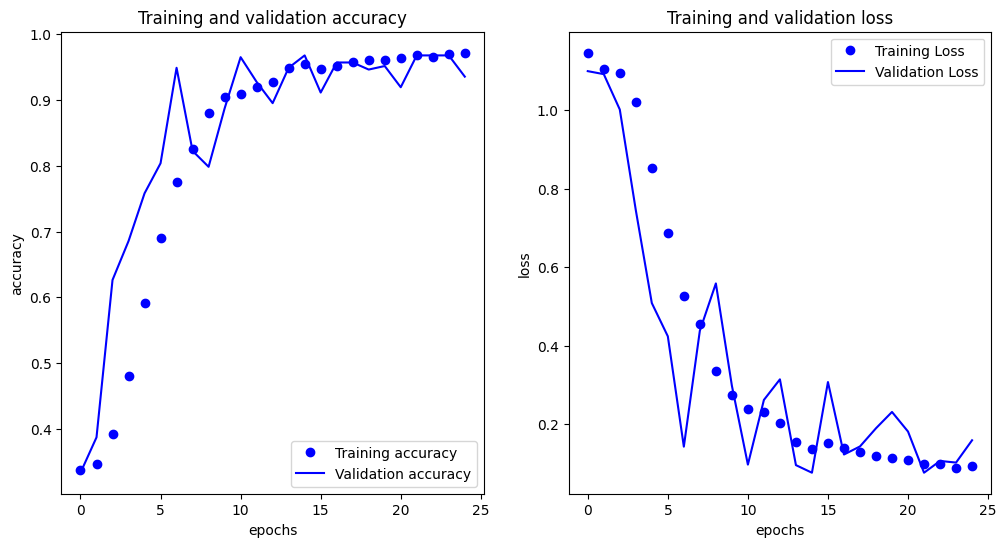

In [22]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'bo', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)

In [24]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    prediction = model_with_aug.predict(image, verbose=0)[0]

    with out:

        print(f'\nmodel output: {prediction}')
        
        prediction_index = np.argmax(prediction)
        
        classes = ["paper", "rock", "scissors"]
        
        predicted_class = classes[prediction_index]
        
        print(f'{filename} is {predicted_class}')


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()